SINGLE TASK XG BOOST

In [1]:
import xgboost as xgb

# Load data
dtrain = xgb.DMatrix('train.data')
dval = xgb.DMatrix('val.data')

# Specify parameters
params = {
    'max_depth': 10,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "min_child_weight": 1,
    "gamma": 0.48,
    "subsample": 1,
    "colsample_bytree": 0.7,
    "nthread": 8,
    "scale_pos_weight": 1,
    
}

# Specify validation set for early stopping
eval_list = [(dval, 'eval'), (dtrain, 'train')]

# Train model
num_round = 1000  # Number of training rounds
bst = xgb.train(params, dtrain, num_round, eval_list, early_stopping_rounds=100)


/home/user/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-auc:0.65180	train-auc:0.95232
[1]	eval-auc:0.66375	train-auc:0.97682
[2]	eval-auc:0.66174	train-auc:0.99122
[3]	eval-auc:0.66822	train-auc:0.99533
[4]	eval-auc:0.67742	train-auc:0.99695
[5]	eval-auc:0.67726	train-auc:0.99909
[6]	eval-auc:0.69030	train-auc:0.99978
[7]	eval-auc:0.69792	train-auc:0.99994
[8]	eval-auc:0.69460	train-auc:0.99998
[9]	eval-auc:0.69179	train-auc:0.99999
[10]	eval-auc:0.69443	train-auc:1.00000
[11]	eval-auc:0.69462	train-auc:1.00000
[12]	eval-auc:0.69370	train-auc:1.00000
[13]	eval-auc:0.69786	train-auc:1.00000
[14]	eval-auc:0.70439	train-auc:1.00000
[15]	eval-auc:0.70515	train-auc:1.00000
[16]	eval-auc:0.70236	train-auc:1.00000
[17]	eval-auc:0.70388	train-auc:1.00000
[18]	eval-auc:0.70537	train-auc:1.00000
[19]	eval-auc:0.70464	train-auc:1.00000
[20]	eval-auc:0.70544	train-auc:1.00000
[21]	eval-auc:0.70795	train-auc:1.00000
[22]	eval-auc:0.71003	train-auc:1.00000
[23]	eval-auc:0.71116	train-auc:1.00000
[24]	eval-auc:0.71112	train-auc:1.00000
[25]	eval-

AUC: 0.7172106608251186
F1 Score: 0.6751361161524501


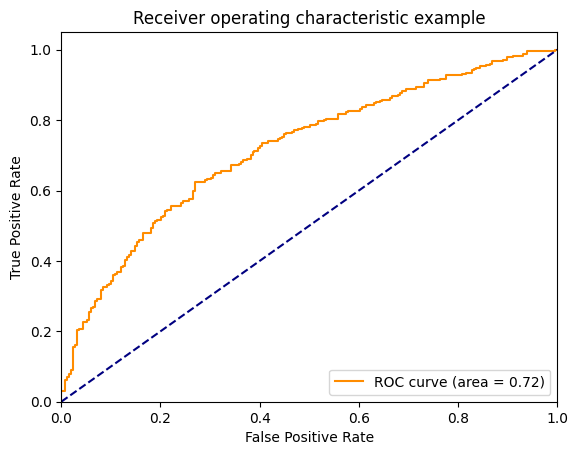

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np

# Assume your validation labels are in a 1-D numpy array named y_val
# y_val = np.array([...])

# predict probabilities

y_pred_proba = bst.predict(dval)
# Convert predicted probabilities to class labels
y_pred_labels = (y_pred_proba > 0.5).astype(int)
# Get true labels from dval
y_val = dval.get_label()

# Calculate F1 score
f1 = f1_score(y_val, y_pred_labels)


# calculate AUC
y_val = dval.get_label()
auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC: {auc}")
print(f"F1 Score: {f1}")

# To plot ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

With Leave One Group Out Cross Validation

In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np

# load libsvm format data
X, y = load_svmlight_file('all.data')

# Convert to dense array for easier indexing
X = X.toarray()

# Extract groups
groups = X[:, 0]

In [2]:
for x in groups:
    print(x)

5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0


In [3]:
X

array([[5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 1., 0., ..., 0., 0., 0.],
       [5., 1., 0., ..., 0., 0., 0.],
       [5., 1., 0., ..., 0., 0., 0.]])

In [14]:
import xgboost as xgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

logo = LeaveOneGroupOut()

auc_scores = []
f1_scores = []

params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "gamma": 0,
    "subsample": 1,
    "colsample_bytree": 1,
    "scale_pos_weight": 1,
}

for train_index, test_index in logo.split(X, y, groups):
    dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
    dtest = xgb.DMatrix(X[test_index], label=y[test_index])

    bst = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dtest, 'eval')], early_stopping_rounds=200)

    # predict probabilities
    y_pred_proba = bst.predict(dtest)
    # Convert predicted probabilities to class labels
    y_pred_labels = (y_pred_proba > 0.5).astype(int)

    # Calculate AUC
    auc = roc_auc_score(y[test_index], y_pred_proba)
    auc_scores.append(auc)
    
    # Calculate F1 score
    f1 = f1_score(y[test_index], y_pred_labels, average='macro')
    f1_scores.append(f1)
    
# Average AUC and F1 scores across all groups
avg_auc = np.mean(auc_scores)
avg_f1 = np.mean(f1_scores)

print(f"Avg AUC: {avg_auc}")
print(f"Avg F1 Score: {avg_f1}")

[0]	eval-auc:0.53471
[1]	eval-auc:0.44834
[2]	eval-auc:0.48357
[3]	eval-auc:0.47171
[4]	eval-auc:0.43448
[5]	eval-auc:0.44223
[6]	eval-auc:0.44389
[7]	eval-auc:0.45202
[8]	eval-auc:0.45867
[9]	eval-auc:0.45214
[10]	eval-auc:0.44343
[11]	eval-auc:0.45758
[12]	eval-auc:0.45204
[13]	eval-auc:0.44584
[14]	eval-auc:0.44350
[15]	eval-auc:0.44212
[16]	eval-auc:0.44565
[17]	eval-auc:0.44256
[18]	eval-auc:0.42936
[19]	eval-auc:0.42724
[20]	eval-auc:0.43077
[21]	eval-auc:0.43160
[22]	eval-auc:0.42953
[23]	eval-auc:0.42887
[24]	eval-auc:0.42848
[25]	eval-auc:0.42647
[26]	eval-auc:0.43369
[27]	eval-auc:0.42826
[28]	eval-auc:0.42473
[29]	eval-auc:0.42192
[30]	eval-auc:0.42178
[31]	eval-auc:0.42178
[32]	eval-auc:0.42702
[33]	eval-auc:0.42892
[34]	eval-auc:0.42531
[35]	eval-auc:0.42393
[36]	eval-auc:0.42341
[37]	eval-auc:0.42619
[38]	eval-auc:0.43226
[39]	eval-auc:0.43399
[40]	eval-auc:0.43190
[41]	eval-auc:0.42909
[42]	eval-auc:0.43011
[43]	eval-auc:0.43328
[44]	eval-auc:0.43650
[45]	eval-auc:0.4343

[166]	eval-auc:0.52089
[167]	eval-auc:0.52113
[168]	eval-auc:0.52086
[169]	eval-auc:0.52004
[170]	eval-auc:0.51930
[171]	eval-auc:0.51943
[172]	eval-auc:0.52061
[173]	eval-auc:0.52129
[174]	eval-auc:0.52250
[175]	eval-auc:0.52269
[176]	eval-auc:0.52397
[177]	eval-auc:0.52262
[178]	eval-auc:0.52264
[179]	eval-auc:0.52261
[180]	eval-auc:0.52283
[181]	eval-auc:0.52391
[182]	eval-auc:0.52491
[183]	eval-auc:0.52467
[184]	eval-auc:0.52552
[185]	eval-auc:0.52493
[186]	eval-auc:0.52470
[187]	eval-auc:0.52588
[188]	eval-auc:0.52553
[189]	eval-auc:0.52496
[190]	eval-auc:0.52408
[191]	eval-auc:0.52365
[192]	eval-auc:0.52382
[193]	eval-auc:0.52354
[194]	eval-auc:0.52451
[195]	eval-auc:0.52493
[196]	eval-auc:0.52444
[197]	eval-auc:0.52430
[198]	eval-auc:0.52479
[199]	eval-auc:0.52477
[200]	eval-auc:0.52470
[0]	eval-auc:0.42170
[1]	eval-auc:0.56274
[2]	eval-auc:0.55077
[3]	eval-auc:0.55939
[4]	eval-auc:0.55867
[5]	eval-auc:0.56513
[6]	eval-auc:0.57471
[7]	eval-auc:0.54789
[8]	eval-auc:0.55220
[9]	ev

[326]	eval-auc:0.65852
[327]	eval-auc:0.66140
[328]	eval-auc:0.66236
[329]	eval-auc:0.66379
[330]	eval-auc:0.66284
[331]	eval-auc:0.66188
[332]	eval-auc:0.65852
[333]	eval-auc:0.65948
[334]	eval-auc:0.66571
[335]	eval-auc:0.66523
[336]	eval-auc:0.66379
[337]	eval-auc:0.66379
[338]	eval-auc:0.66140
[339]	eval-auc:0.66140
[340]	eval-auc:0.66140
[341]	eval-auc:0.66379
[342]	eval-auc:0.66236
[343]	eval-auc:0.65948
[344]	eval-auc:0.65900
[345]	eval-auc:0.65805
[346]	eval-auc:0.65805
[347]	eval-auc:0.65852
[348]	eval-auc:0.65757
[349]	eval-auc:0.65852
[350]	eval-auc:0.65900
[351]	eval-auc:0.66044
[352]	eval-auc:0.66284
[353]	eval-auc:0.66427
[354]	eval-auc:0.66475
[355]	eval-auc:0.66667
[356]	eval-auc:0.66523
[357]	eval-auc:0.66810
[358]	eval-auc:0.66475
[359]	eval-auc:0.66331
[360]	eval-auc:0.66619
[361]	eval-auc:0.66571
[362]	eval-auc:0.66619
[363]	eval-auc:0.66379
[364]	eval-auc:0.66427
[365]	eval-auc:0.66427
[366]	eval-auc:0.66427
[367]	eval-auc:0.66475
[368]	eval-auc:0.66379
[369]	eval-

[683]	eval-auc:0.67146
[684]	eval-auc:0.67289
[685]	eval-auc:0.67241
[686]	eval-auc:0.67193
[687]	eval-auc:0.67241
[688]	eval-auc:0.67433
[689]	eval-auc:0.67433
[690]	eval-auc:0.67433
[691]	eval-auc:0.67481
[692]	eval-auc:0.67433
[693]	eval-auc:0.67481
[694]	eval-auc:0.67433
[695]	eval-auc:0.67337
[0]	eval-auc:0.59066
[1]	eval-auc:0.54185
[2]	eval-auc:0.52785
[3]	eval-auc:0.52519
[4]	eval-auc:0.53076
[5]	eval-auc:0.51931
[6]	eval-auc:0.52538
[7]	eval-auc:0.53423
[8]	eval-auc:0.51464
[9]	eval-auc:0.53825
[10]	eval-auc:0.53608
[11]	eval-auc:0.53373
[12]	eval-auc:0.52592
[13]	eval-auc:0.53660
[14]	eval-auc:0.55322
[15]	eval-auc:0.55955
[16]	eval-auc:0.54909
[17]	eval-auc:0.54256
[18]	eval-auc:0.54755
[19]	eval-auc:0.55163
[20]	eval-auc:0.54651
[21]	eval-auc:0.54894
[22]	eval-auc:0.55337
[23]	eval-auc:0.55666
[24]	eval-auc:0.55493
[25]	eval-auc:0.55107
[26]	eval-auc:0.54439
[27]	eval-auc:0.54191
[28]	eval-auc:0.54235
[29]	eval-auc:0.53870
[30]	eval-auc:0.54157
[31]	eval-auc:0.53996
[32]	ev

[153]	eval-auc:0.57299
[154]	eval-auc:0.57352
[155]	eval-auc:0.57313
[156]	eval-auc:0.57451
[157]	eval-auc:0.57419
[158]	eval-auc:0.57432
[159]	eval-auc:0.57357
[160]	eval-auc:0.57311
[161]	eval-auc:0.57269
[162]	eval-auc:0.57180
[163]	eval-auc:0.57138
[164]	eval-auc:0.57145
[165]	eval-auc:0.57067
[166]	eval-auc:0.57062
[167]	eval-auc:0.57060
[168]	eval-auc:0.56980
[169]	eval-auc:0.56881
[170]	eval-auc:0.56623
[171]	eval-auc:0.56488
[172]	eval-auc:0.56467
[173]	eval-auc:0.56495
[174]	eval-auc:0.56403
[175]	eval-auc:0.56361
[176]	eval-auc:0.56322
[177]	eval-auc:0.56444
[178]	eval-auc:0.56532
[179]	eval-auc:0.56529
[180]	eval-auc:0.56534
[181]	eval-auc:0.56543
[182]	eval-auc:0.56490
[183]	eval-auc:0.56483
[184]	eval-auc:0.56495
[185]	eval-auc:0.56499
[186]	eval-auc:0.56504
[187]	eval-auc:0.56580
[188]	eval-auc:0.56699
[189]	eval-auc:0.56541
[190]	eval-auc:0.56633
[191]	eval-auc:0.56722
[192]	eval-auc:0.56594
[193]	eval-auc:0.56658
[194]	eval-auc:0.56828
[195]	eval-auc:0.56858
[196]	eval-

[30]	eval-auc:0.50876
[31]	eval-auc:0.50715
[32]	eval-auc:0.50616
[33]	eval-auc:0.50713
[34]	eval-auc:0.50344
[35]	eval-auc:0.50490
[36]	eval-auc:0.50168
[37]	eval-auc:0.49973
[38]	eval-auc:0.50713
[39]	eval-auc:0.50798
[40]	eval-auc:0.50800
[41]	eval-auc:0.50925
[42]	eval-auc:0.51036
[43]	eval-auc:0.51189
[44]	eval-auc:0.51548
[45]	eval-auc:0.51929
[46]	eval-auc:0.51550
[47]	eval-auc:0.51823
[48]	eval-auc:0.51772
[49]	eval-auc:0.51973
[50]	eval-auc:0.51990
[51]	eval-auc:0.52261
[52]	eval-auc:0.52078
[53]	eval-auc:0.51920
[54]	eval-auc:0.52395
[55]	eval-auc:0.52310
[56]	eval-auc:0.52261
[57]	eval-auc:0.52276
[58]	eval-auc:0.52186
[59]	eval-auc:0.52152
[60]	eval-auc:0.51954
[61]	eval-auc:0.51668
[62]	eval-auc:0.51550
[63]	eval-auc:0.51442
[64]	eval-auc:0.51462
[65]	eval-auc:0.51559
[66]	eval-auc:0.51820
[67]	eval-auc:0.51942
[68]	eval-auc:0.52218
[69]	eval-auc:0.52156
[70]	eval-auc:0.52251
[71]	eval-auc:0.52280
[72]	eval-auc:0.52274
[73]	eval-auc:0.52267
[74]	eval-auc:0.52278
[75]	eval-

In [15]:
print(f"Avg AUC: {avg_auc}")
print(f"Avg F1 Score: {avg_f1}")

Avg AUC: 0.5451960991468645
Avg F1 Score: 0.5167530180736131
